In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [7]:
df.head(5)

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [3]:
# Missing Values:
df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

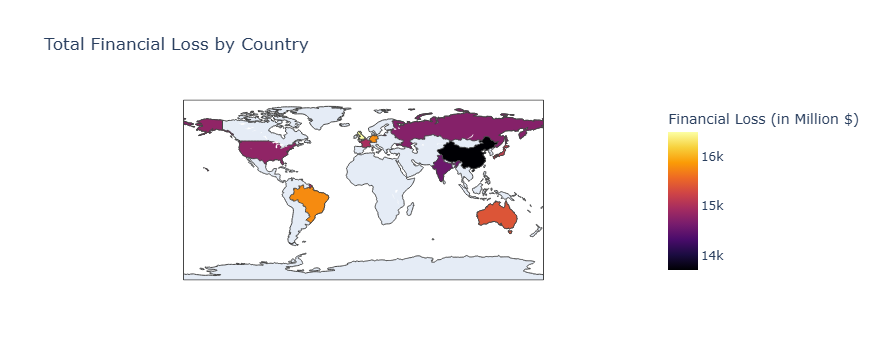

In [20]:
# Aggregate Financial Loss by Country
df_country_loss = df.groupby('Country')['Financial Loss (in Million $)'].sum().reset_index()

fig = px.choropleth(df_country_loss, locations='Country', locationmode='country names', color='Financial Loss (in Million $)',
    color_continuous_scale='Inferno', title="Total Financial Loss by Country" )
fig.show()

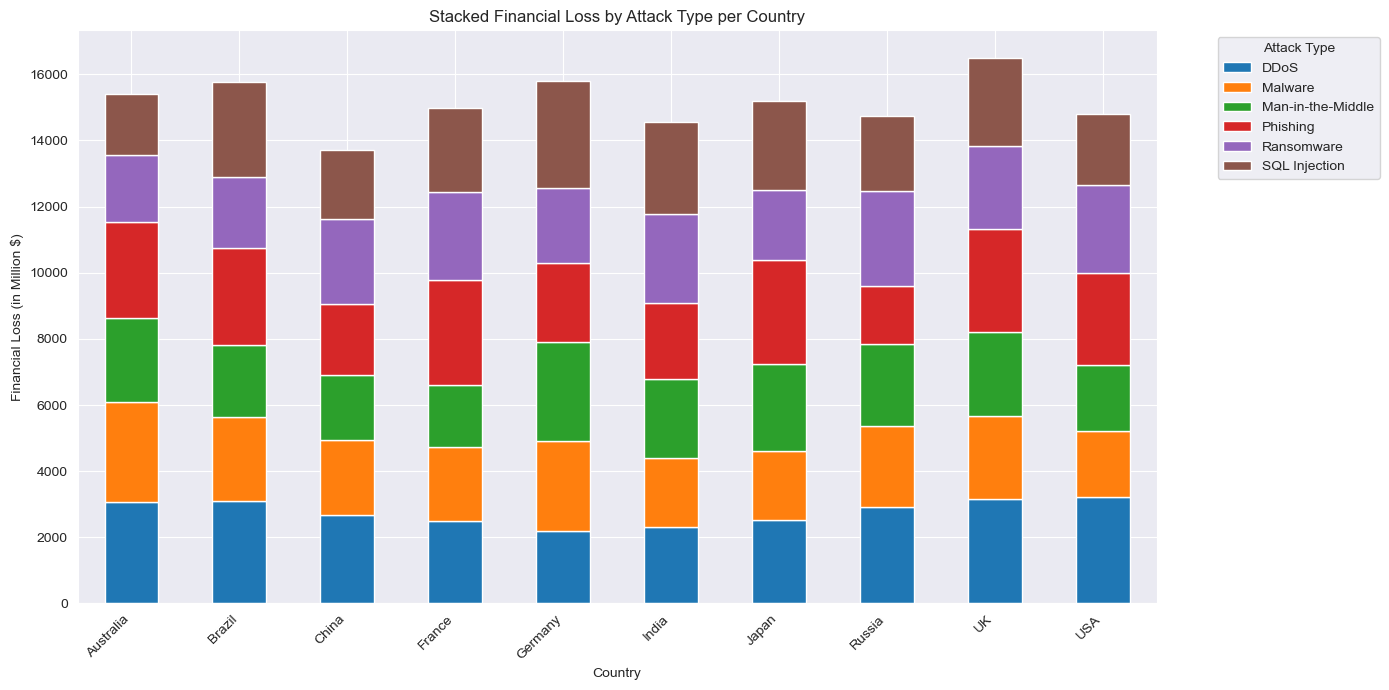

In [21]:
grouped_by_country = df.groupby(['Country', 'Attack Type'])['Financial Loss (in Million $)'].sum().reset_index()
pivot_df = grouped_by_country.pivot(index='Country', columns='Attack Type', values='Financial Loss (in Million $)')
pivot_df = pivot_df.fillna(0)  # Fill missing values with 0

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title('Stacked Financial Loss by Attack Type per Country')
plt.xlabel('Country')
plt.ylabel('Financial Loss (in Million $)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

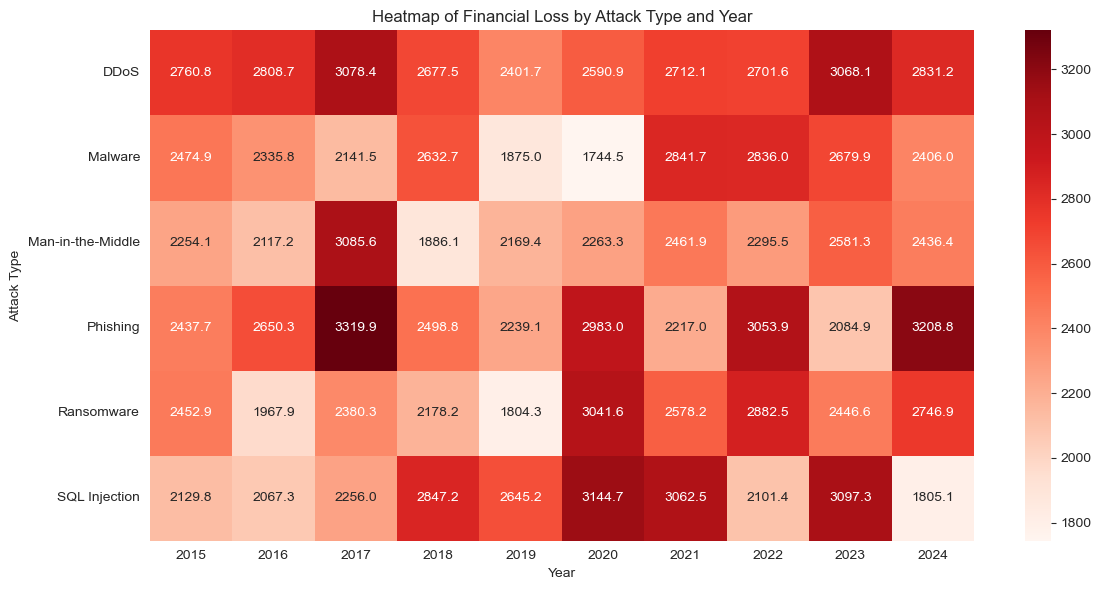

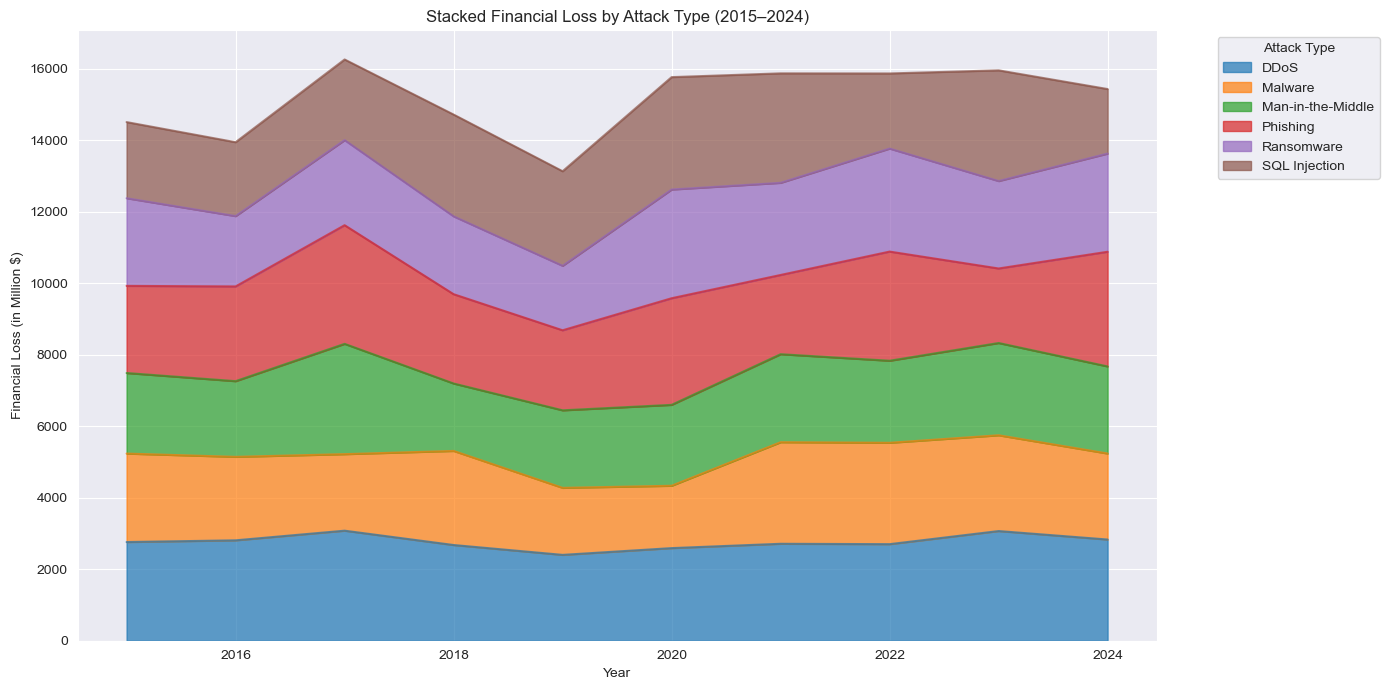

In [23]:
grouped_by_country = df.groupby(['Country', 'Attack Type'])['Financial Loss (in Million $)'].sum().reset_index()
pivot_df = grouped_df.pivot(index='Year', columns='Attack Type', values='Financial Loss (in Million $)')
pivot_df.plot.area(figsize=(14, 7), alpha=0.7)

plt.title('Stacked Financial Loss by Attack Type (2015–2024)')
plt.xlabel('Year')
plt.ylabel('Financial Loss (in Million $)')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()